# Michael Dorado
### January 11th, 2024
## Sprint 1 - Alternative Fuel Stations Exploratory Data Analysis 


Alternative fueling stations are located throughout the United States, and their availability continues to grow. The Alternative Fuels Data Center (AFDC) maintains a website where you can find alternative fueling stations near you or on a route, obtain counts of alternative fueling stations by state, view maps, and more.
The dataset used for this notebook was published by the National Renewable Energy Laboratory on July 31st, 2021.

### Problem Statement
Many consumers are now opting for electric vehicles over gas powered vehicles when purchasing a new vehicle. However, The United States' public electric vehicle charging network must meet the demand of EV sales rapid increase. In an October 2022 survey, 46 percent of U.S. consumers mentioned the lack of public charging as one of their leading concerns regarding battery-electric vehicles.

### The Problem area
My area of interest is AFS infrastructure growth, as well as EV market growth. I want my project to address the feasibility of replacing gas powered vehicles sales with EVs, and comprehend the supply of AFS versus the demand of EV vehicles.


### The Big Idea
Machine learning can help identify and quantify areas of opportunity in the alternative fuel station United States infrastructure. Using next point forecast analysis, we could assist automobile consumers in making informed decisions when deciding between an electric or gas-powered vehicle investment.



In [27]:
# Formatting the Notebook width
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [28]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

In [29]:
# Importing Dataset as 'df'
df_original = pd.read_csv('Alternative Fuel Stations.csv')
df = df_original.copy()

## Preparing, Cleaning, and Digesting the Dataframe

In [30]:
# df info overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56800 entries, 0 to 56799
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    56800 non-null  object 
 1   Station Name                      56800 non-null  object 
 2   Street Address                    56798 non-null  object 
 3   Intersection Directions           4827 non-null   object 
 4   City                              56800 non-null  object 
 5   State                             56800 non-null  object 
 6   ZIP                               56800 non-null  object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     52437 non-null  object 
 9   Status Code                       56800 non-null  object 
 10  Expected Date                     376 non-null    object 
 11  Groups With Access Code           56800 non-null  object 
 12  Acce

The Dataset contains columns for alternative fuel stations that do not pertain to electric vehicles.
These do not support my analysis, therefore, I am going to get rid of any columns that are irrelevant to my study, and columns with a low non-null count.

In [31]:
# Removing columns
non_EV_Data = ['Intersection Directions','Station Phone', 'Plus4','Expected Date','BD Blends','EV Other Info', 'NG Fill Type Code', 'NG PSI','Owner Type Code', 'Federal Agency ID',
               'Federal Agency Name','Hydrogen Status Link','NG Vehicle Class','LPG Primary','E85 Blender Pump','Intersection Directions (French)','Access Days Time (French)',
              'BD Blends (French)','Groups With Access Code (French)','Hydrogen Is Retail','Access Detail Code','Federal Agency Code','Federal Agency Code','CNG Dispenser Num','CNG On-Site Renewable Source',
               'CNG Total Compression Capacity','CNG Storage Capacity','LNG On-Site Renewable Source','E85 Other Ethanol Blends','EV Pricing (French)','LPG Nozzle Types','Hydrogen Pressures',
              'Hydrogen Standards','CNG Fill Type Code','CNG PSI','CNG Vehicle Class','LNG Vehicle Class','Restricted Access','EV On-Site Renewable Source','Status Code','Country','ID'] 

df = df.drop(columns=non_EV_Data)


In [32]:
# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56800 entries, 0 to 56799
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fuel Type Code           56800 non-null  object 
 1   Station Name             56800 non-null  object 
 2   Street Address           56798 non-null  object 
 3   City                     56800 non-null  object 
 4   State                    56800 non-null  object 
 5   ZIP                      56800 non-null  object 
 6   Groups With Access Code  56800 non-null  object 
 7   Access Days Time         53245 non-null  object 
 8   Cards Accepted           9012 non-null   object 
 9   EV Level1 EVSE Num       1030 non-null   float64
 10  EV Level2 EVSE Num       42282 non-null  float64
 11  EV DC Fast Count         5410 non-null   float64
 12  EV Network               47080 non-null  object 
 13  EV Network Web           38938 non-null  object 
 14  Geocode Status        

In [33]:
# Checking for duplicate columns 
df.T.duplicated().any()

False

In [34]:
# Checking for duplicate rows 
df[df.duplicated()].any()

Fuel Type Code              True
Station Name                True
Street Address              True
City                        True
State                       True
ZIP                         True
Groups With Access Code     True
Access Days Time            True
Cards Accepted             False
EV Level1 EVSE Num          True
EV Level2 EVSE Num          True
EV DC Fast Count           False
EV Network                  True
EV Network Web              True
Geocode Status              True
Latitude                    True
Longitude                   True
Date Last Confirmed         True
Updated At                  True
Open Date                   True
EV Connector Types          True
Access Code                 True
Facility Type               True
EV Pricing                  True
dtype: bool

In [35]:
# Snapshot of the dataframe
df.head(5)

,Fuel Type Code,Station Name,Street Address,City,State,ZIP,Groups With Access Code,Access Days Time,Cards Accepted,EV Level1 EVSE Num,...,Geocode Status,Latitude,Longitude,Date Last Confirmed,Updated At,Open Date,EV Connector Types,Access Code,Facility Type,EV Pricing
0,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,Montgomery,AL,36107,Private,NaN,NaN,NaN,...,200-9,32.367916,-86.267021,11/9/2020,2021-07-29 15:08:10 UTC,12/1/2010,NaN,private,STANDALONE_STATION,NaN
1,CNG,PS Energy - Atlanta,340 Whitehall St,Atlanta,GA,30303,Public - Card key at all times,24 hours daily,Comdata FleetOne FuelMan Voyager Wright_Exp,NaN,...,200-8,33.745843,-84.398837,10/9/2020,2021-07-26 13:24:55 UTC,7/15/1994,NaN,public,STANDALONE_STATION,NaN
2,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,Atlanta,GA,30324,Private - Government only,NaN,NaN,NaN,...,200-8,33.821911,-84.367461,3/3/2020,2021-07-27 21:03:31 UTC,12/15/1996,NaN,private,FLEET_GARAGE,NaN
3,CNG,United Parcel Service,270 Marvin Miller Dr,Atlanta,GA,30336,Private,NaN,NaN,NaN,...,200-9,33.760256,-84.543822,4/8/2021,2021-04-08 20:32:57 UTC,1/1/1997,NaN,private,STANDALONE_STATION,NaN
4,CNG,Clean Energy - Texas Department of Transportation,7721A Washington St,Houston,TX,77007,Public - Credit card at all times,24 hours daily; call 866-809-4869 for Clean En...,CleanEnergy D FuelMan M V Voyager Wright_Exp,NaN,...,200-9,29.779918,-95.435385,1/14/2021,2021-07-20 14:30:28 UTC,12/15/1996,NaN,public,STATE_GOV,NaN


In [36]:
# I removed the columns that did not pertain to EVs, however, there are still records for non-EV on the 'Fuel Type Code' column
df['Fuel Type Code'].value_counts()

ELEC    47086
E85      4233
LPG      2893
CNG      1569
BD        726
LNG       150
HY        143
Name: Fuel Type Code, dtype: int64

In [37]:
# Cleaning the dataframe further to only see "ELEC" records
EV_Only = 'ELEC'  # Replace this with the value you want to filter by

df = df[df['Fuel Type Code'] == EV_Only]

In [38]:
# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47086 entries, 159 to 56793
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fuel Type Code           47086 non-null  object 
 1   Station Name             47086 non-null  object 
 2   Street Address           47086 non-null  object 
 3   City                     47086 non-null  object 
 4   State                    47086 non-null  object 
 5   ZIP                      47086 non-null  object 
 6   Groups With Access Code  47086 non-null  object 
 7   Access Days Time         45017 non-null  object 
 8   Cards Accepted           911 non-null    object 
 9   EV Level1 EVSE Num       1030 non-null   float64
 10  EV Level2 EVSE Num       42282 non-null  float64
 11  EV DC Fast Count         5410 non-null   float64
 12  EV Network               47080 non-null  object 
 13  EV Network Web           38938 non-null  object 
 14  Geocode Status      

In [39]:
# Changing the 'Open Date','Updated At', 'Date Last Confirmed' column values to datetime dtype, using a For Loop
to_datetime = ['Open Date', 'Updated At','Date Last Confirmed']  # Replace these with the columns you want to convert

for column in to_datetime:
    df[column] = pd.to_datetime(df[column])

In [40]:
# Reposition column 'Access Code' to where it makes more sense
move_AccessCode = 'Access Code'
new_position = 6
column = df.pop(move_AccessCode)
df.insert(new_position, move_AccessCode, column)


In [41]:
# Reposition column 'Facility Type' to where it makes more sense
move_FacilityType = 'Facility Type'
new_position = 6
column = df.pop(move_FacilityType)
df.insert(new_position, move_FacilityType, column)

In [42]:
# Snapshot of the cleaned dataframe
df.head(5)

,Fuel Type Code,Station Name,Street Address,City,State,ZIP,Facility Type,Access Code,Groups With Access Code,Access Days Time,...,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,Updated At,Open Date,EV Connector Types,EV Pricing
159,ELEC,LADWP - Truesdale Center,11797 Truesdale St,Sun Valley,CA,91352,UTILITY,private,Private,Fleet use only,...,Non-Networked,NaN,GPS,34.248319,-118.387971,2021-07-14,2021-07-14 18:51:43+00:00,1999-10-15,CHADEMO J1772 J1772COMBO,NaN
160,ELEC,LADWP - West LA District Office,1394 S Sepulveda Blvd,Los Angeles,CA,90024,UTILITY,private,Private,NaN,...,Non-Networked,NaN,200-8,34.052542,-118.448504,2021-07-14,2021-07-14 18:51:43+00:00,2020-02-28,J1772,Free
161,ELEC,Southern California Edison - Rosemead Office B...,2244 Walnut Grove Ave,Rosemead,CA,91770,UTILITY,private,TEMPORARILY UNAVAILABLE (Private),Employee use only,...,Greenlots,http://greenlots.com/,200-9,34.050745,-118.081014,2021-01-14,2021-03-11 23:22:17+00:00,2011-08-01,J1772 NEMA520,NaN
162,ELEC,Los Angeles Convention Center,1201 S Figueroa St,Los Angeles,CA,90015,PARKING_GARAGE,public,Public,24 hours daily; pay lot,...,Non-Networked,NaN,GPS,34.040539,-118.271387,2020-11-09,2021-03-11 23:22:17+00:00,1995-08-30,J1772,NaN
163,ELEC,LADWP - John Ferraro Building,111 N Hope St,Los Angeles,CA,90012,UTILITY,private,Private,For fleet and employee use only,...,Non-Networked,NaN,GPS,34.059133,-118.248589,2021-07-14,2021-07-14 18:51:43+00:00,1999-10-15,CHADEMO J1772 J1772COMBO,NaN


In [43]:
# Checking Value counts
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print("\n")

Column: Fuel Type Code
ELEC    47086
Name: Fuel Type Code, dtype: int64


Column: Station Name
Walmart                               66
Whole Foods Market                    63
Wawa - Tesla Supercharger             54
Target - Tesla Supercharger           46
Sheetz - Tesla Supercharger           44
                                      ..
MOM's of Rosemont                      1
Common Market Co-op RT85               1
MOM's Organic Market - Frederick       1
Walgreens - Philadelphia, PA #7544     1
Figueroa Plaza P4                      1
Name: Station Name, Length: 44720, dtype: int64


Column: Street Address
1201 Pine St          81
2910 Tannery Way      79
Unnamed Road          59
806 S Airport Blvd    57
1 Facebook Way        56
                      ..
1531  7th Ave          1
1415  5th Ave          1
1000 1st Ave           1
100 Stewart St         1
23600 Rondell St.      1
Name: Street Address, Length: 32689, dtype: int64


Column: City
Los Angeles             1343
San Diego   

### Data Dictionary
`Fuel Type Code:` Dataset Fuel Code, filtered to 'ELECTRIC' only <br>
`Station Name:` Name of Alternative Fuel Station <br>
`Street Address:` Address of Alternative Fuel Station <br>
`City:` City where the Alternative Fuel Station is located <br>
`State:` State where the Alternative Fuel Station is located <br>
`Zip:` Address of Alternative Fuel Station <br>
`Facility Type:` Type of facility for the Alternative Fuel Station location <br>
`Access Code:` Type of access where the Alternative Fuel Station is located <br>
`Group With Access Code:` Group category for the type of access for the Alternative Fuel Station location <br>
`Access Days Time:` Accessible days and time for the locations <br>
`Cards Accepted:` Types of cards accepted A = Amex, D = Discovery, M = MasterCard, V = Visa <br>
`EV Level1 EVSE Num:` Qty of Standard 120V Charging Station <br>
`EV Level2 EVSE Num:` Qty of More Powerful 208/240V Charging Station <br>
`EV DC Fast Count:` Qty of Fastest Charging Station Type <br>
`EV Network:` Charging station infrastructure system <br>
`EV Network Web:` Link for charging station infrastructure system <br>
`Geocode Status:` Address Geocode <br>
`Latitude:` Facility's location latitude <br>
`Longitude:` Facility's location longitude <br>
`Date Last Confirmed:` Last revision date for the dataframe record <br>
`Updated At:` Last revision date and time for the dataframe record <br>
`Open Date:` Date when the facility was inaugurated <br>
`EV Connector Types:` Type of charging station connector <br>
`EV Pricing:` Cost to charge vehicles at the facility <br>

I am now going to visualize some of the records in my dataframe, to take a different angle on exploring the data.

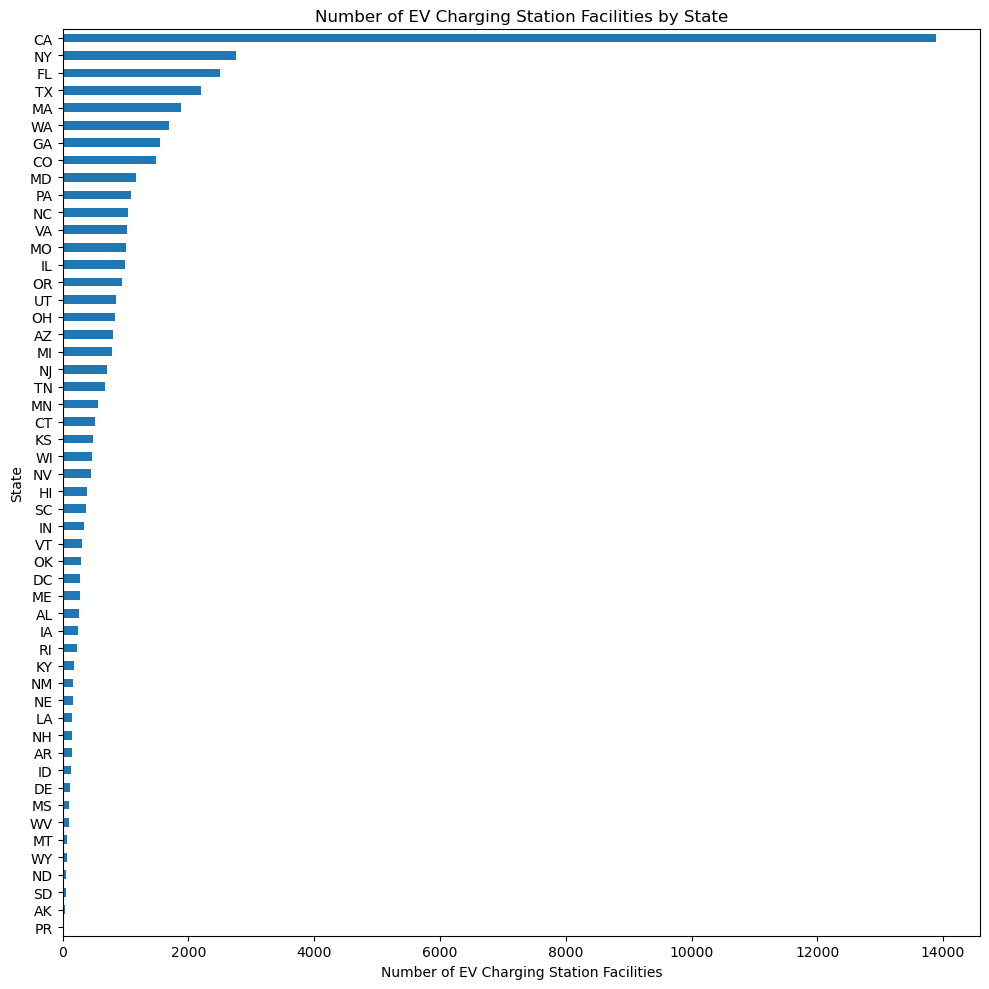

In [21]:
# Let's look at the deployment of Electric Charging Stations by State
plt.figure(figsize=(10, 10))
df["State"].value_counts().sort_values(ascending=True).plot(kind="barh")
plt.xlabel("Number of EV Charging Station Facilities")
plt.ylabel("State")
plt.title("Number of EV Charging Station Facilities by State")
plt.tight_layout()
plt.show()

From the chart above it can be visualized the states in the US with the most EV charging station facilities.
California is the state with the most EV charging stations facilities.

In [52]:
# Formatting the 'Open Year' values from float to int
df['Open Year'] = df['Open Year'].fillna(0).astype(int)

In [66]:
# Converting Open Year back to DateTime
df['Open Year'] = pd.to_datetime(df['Open Year'], errors='coerce')

In [71]:
# Converting Open Date back to Year
df['Open Year'] = df['Open Date'].dt.year

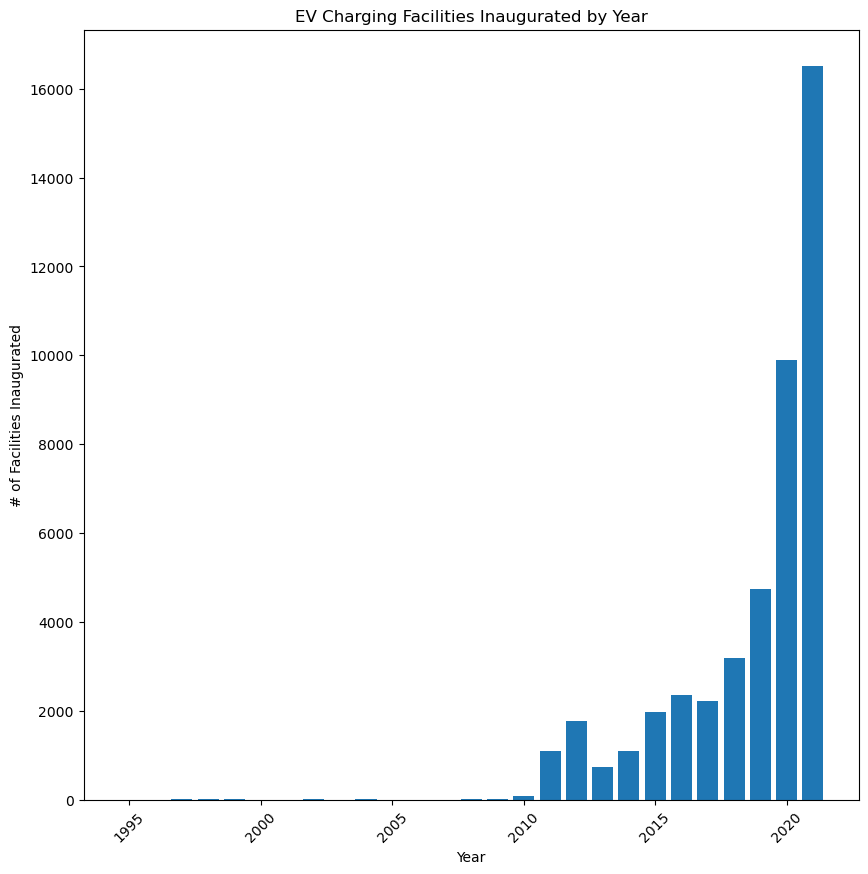

In [78]:
plt.figure(figsize=(10, 10))
plt.bar(df['Open Year'].value_counts().index,
        df['Open Year'].value_counts().values)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('# of Facilities Inaugurated')
plt.title('EV Charging Facilities Inaugurated by Year')
plt.show()

From the chart below we see the number of EV Charging station facilities inaugurated over the years.
The numbers are growing significantly over since 2017.